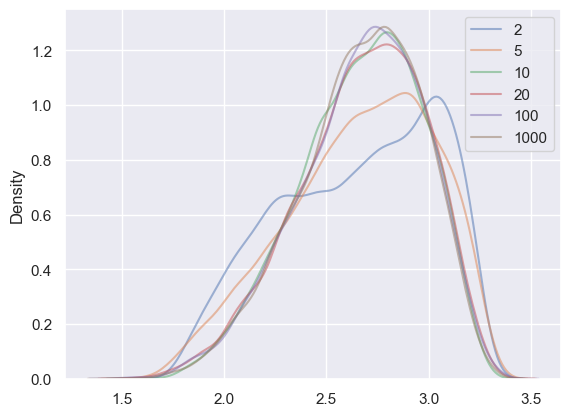

In [181]:
from scipy import stats

# N = 10000
# alpha = np.random.randn()
# beta = np.random.randn(1000)
# for p in [2,5,10,20,100,1000]:
#     X = np.random.rand(N*p).reshape((N,p))
#     eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
#     z = eta
#     sns.kdeplot(z, alpha=0.5, label=p)
# plt.legend()
# # plt.xlim(0,1)


N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = 1 + 5*gam*stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
# plt.xlim(0,1)

In [213]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d
import numpy as np
from scipy import stats


sns.set_theme()
sns.set_style("white")
sns.set_context("paper")

p = 10


def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs
    
    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)


alpha=np.random.randn()
beta=np.random.randn(p)
for i in range(10):    
    x = np.random.randn(p)
    sig0=1
    gam=2.5
    x, y, mx = gen_data(1, p, alpha, beta)

    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs
    
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    # Q0 = mu + sig * STD_NORMAL_Q
    # Q1 = W1d.noise_2(Q0, l=2)
    # compose = lambda f, g: np.interp(g, W1d.Wasserstein1D.GRID, f)
    # plt.plot(W1d.Wasserstein1D.GRID, Q0, color='black', alpha=0.1)
    # sort_index = np.argsort(Q1)
    # Q = Q1[sort_index]
    # P = W1d.Wasserstein1D.GRID[sort_index]
    # spline = UnivariateSpline(Q, P, k=5, s=10)
    # pdf = spline.derivative()
    # plt.plot(Q1[1:-1], pdf(Q1[1:-1]))
    # xs = np.linspace(-20,20,300)
    # plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=0.5)
    
    # plt.plot(W1d.Wasserstein1D.GRID, Q0, color='black', alpha=0.1)
    # plt.plot(W1d.Wasserstein1D.GRID, y[0], color='black', alpha=0.1)
    # plt.plot(W1d.Wasserstein1D.GRID, mx[0], color='black', alpha=0.1)
    # plt.scatter([mu], [sig])

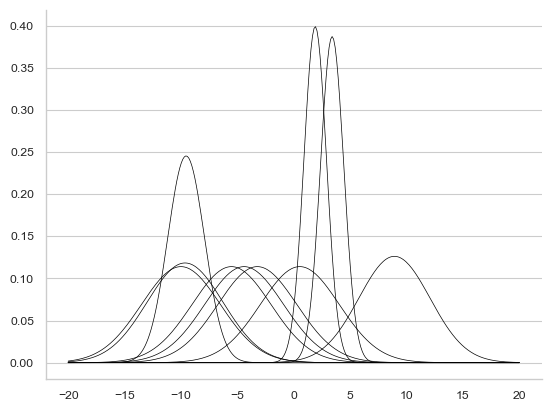

In [226]:
from pyfrechet.metric_spaces import *
import numpy as np
from scipy import stats

np.random.seed(22)
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper")
p = 10
alpha=np.random.randn()
beta=np.random.randn(p)
sig0=1
gam=2.5
for i in range(10):    
    x = np.random.randn(p)
    eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
    mu = 10*np.cos(eta*np.pi)
    sig = sig0 + gam*stats.logistic.cdf(eta)
    xs = np.linspace(-20,20,300)
    plt.plot(xs, stats.norm.pdf(xs, loc=mu, scale=sig), color='black', alpha=1, linewidth=0.5)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.grid(axis='x')
plt.savefig("./plots/sample_wasserstein.pdf")

In [1]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 
from benchmark import bench

import numpy as np
from scipy import stats

from pyfrechet.metric_spaces import *
import pyfrechet.metric_spaces.wasserstein_1d as W1d

OUT_FILE = 'results/result_wasserstein_cross_est_new_dgp_75.json'

def gen_data(N, p, alpha, beta, sig0=1, gam=2.5):
    M = W1d.Wasserstein1D()
    
    STD_NORMAL_Q = stats.norm.ppf(W1d.Wasserstein1D.GRID)
    STD_NORMAL_Q[0] = 2*STD_NORMAL_Q[1] - STD_NORMAL_Q[2] # lexp to avoid infs
    STD_NORMAL_Q[-1] = 2*STD_NORMAL_Q[-2] - STD_NORMAL_Q[-3] # lexp to avoid infs

    def m(x):
        eta = 10*(x-0.5).dot(beta)/np.sqrt(p) + alpha
        mu = eta
        sig = sig0 + gam*stats.logistic.cdf(eta)
        return mu + sig * STD_NORMAL_Q

    x = np.random.rand(N*p).reshape((N,p))
    mx = np.array([ m(x[i,:]) for i in range(N)])
    y = np.array([ W1d.noise_2(mx[i,:], l=2) for i in range(N)])

    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[2, 5, 10, 20],
    Ns=[50,100,200,400],
    replicas=75
)

INFO: Using numpy backend
INFO: NumExpr defaulting to 8 threads.


[2023-06-16 15:55:20.931061] Progress: N=50	p=2	i=0
[2023-06-16 15:55:20.936627] Distances for cart_2means
[2023-06-16 15:55:20.936637] dt = 0
[2023-06-16 15:55:20.936640] Fitting for cart_2means
[2023-06-16 15:55:20.979633] dt = 0.04300522804260254
[2023-06-16 15:55:20.979654] MSE for cart_2means
[2023-06-16 15:55:20.982166] Distances for medoid_greedy


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json

OUT_FILE = 'results/result_wasserstein_cross_est_new_dgp.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)

df['fitting_duration'] = df['duration'] - df['dist_duration']
# df = df[df.duration < 2]
# sns.boxplot(df, y='duration', x='method')

/Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _df = df.groupby(['N', 'p', 'method']).mean().reset_index().copy()


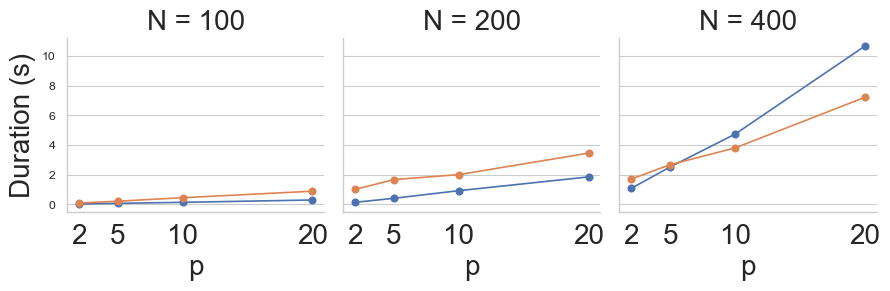

In [26]:
from plot_bench import *
sns.set_theme()
sns.set_style("white")
forest_df = make_forest_df(df[df.method != 'medoid_2means'])
grid = plot_forest_df(forest_df)
plt.savefig("./plots/runtime_wasserstein.pdf")

## MSE CART vs Medoid

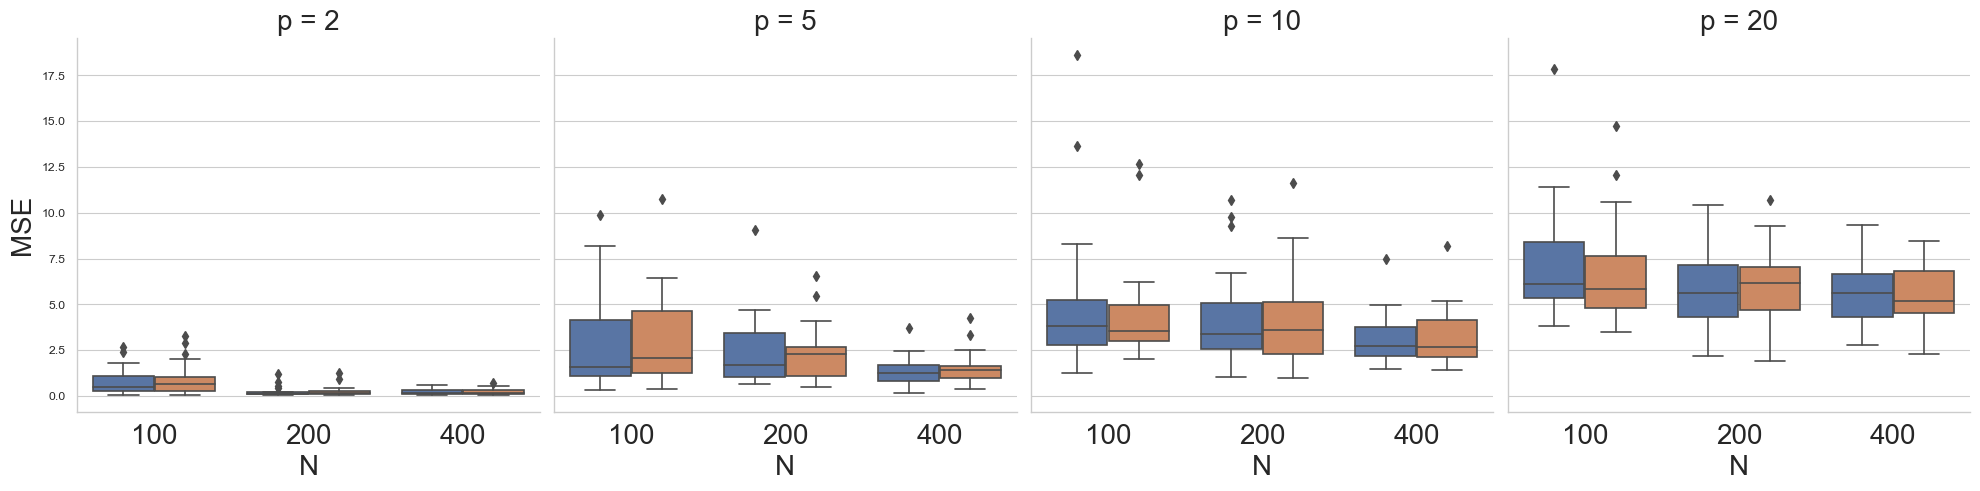

In [25]:
from plot_bench import *

plot_errors(df[(df.N > 50) & (df.method != 'medoid_2means')])
plt.savefig("./plots/error_wasserstein.pdf")

## Runtime CART vs Medoid

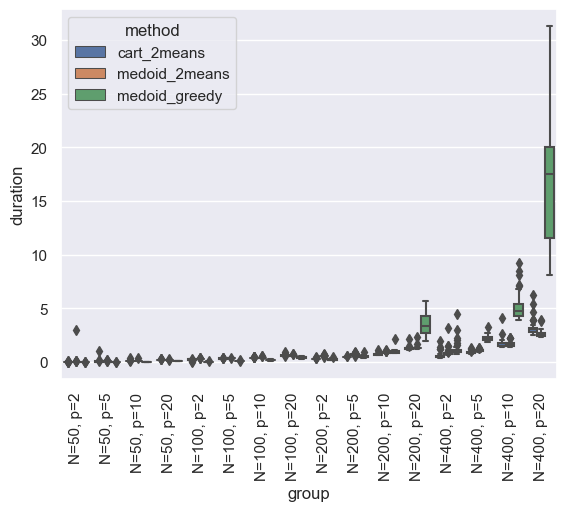

In [28]:
sns.boxplot(df, y='duration', x='group', hue='method')
plt.xticks(rotation=90);